# Considerações:

- Sem usar o LangChain nesse exemplo.
- Exemplo simples sem usar muitos parâmetros para o modelo na parte 'Chat Básico'
- Eemplo de configuração de 'Roles'
- Último exemplo com a configuração de 'Hiper-parâmetros' 

# Setup

In [1]:
# importando as bibliotecas

from openai import OpenAI
import os
import yaml

In [2]:
# lendo o arquivo config.yaml para ter acesso a chave de acesso da OpenAI

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
    
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Chat Básico

In [3]:
client = OpenAI() # instanciando um objeto da OpenAI, no caso, chamado 'client'
model = "gpt-3.5-turbo" # um dos modelos de Chat

# a instância 'client' chama o metodo chat.completions.create e passa alguns parametros, como modelo e
# messages, definindo o role que o modelo deve seguir
# como o role=user, então é a entrada do usuário, o input que está definido em content
response = client.chat.completions.create(
  model=model,
  messages=[
    {"role": "user", "content": "Conte uma Piada!"}
  ]
)

# 'response' é o nome da variável que receberá a resposta do modelo conforme 'messages', o modelo retorna mais informações 
# além da resposta como visto na célula abaixo (print(response))

In [4]:
# imprimindo a resposta do modelo

print(response)

ChatCompletion(id='chatcmpl-Af4kATB23dKiaLmnsz1uLtGEk77Kz', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Por que o livro de matemática ficou de castigo?\n\nPorque ele estava cheio de problemas!', role='assistant', function_call=None, tool_calls=None, refusal=None))], created=1734353046, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=23, prompt_tokens=13, total_tokens=36, prompt_tokens_details={'cached_tokens': 0, 'audio_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}))


In [5]:
# imprimindo o tipo da resposta do modelo

print(type(response))

<class 'openai.types.chat.chat_completion.ChatCompletion'>


In [6]:
# Salvando na variável 'message' apenas o texto de resposta do modelo e imprimindo.
# Se observar na resposta integral retornada pelo modelo a resposta fica na lista de nome 'choices' e 
# como só foi pedido para gerar uma resposta o indice é 0. 
# .message.content, pois a resposta em si está salva nesse item da lista.

message = (response.choices[0].message.content)
print(message)

Por que o livro de matemática ficou de castigo?

Porque ele estava cheio de problemas!


# Roles


In [7]:
# nesse exemplo tem a definição de mais um role
# a mensagem é uma lista de dicionário(s), contendo o 'role' e o 'content'
# em role:system é indicado para o modelo como ele deve se comportar. Em content é definido que ele será um 
# assistente de investimento ficticio.
# em role:user é indicado o que é desejado que o modelo faça, no caso em content é indicado para indicar um investimento de baixo risco

response = client.chat.completions.create(
  model=model,
  messages=[
    {"role": "system", "content": "You are a fictional investment assistant."},
    {"role": "user", "content": "What is the best low-risk investment you recommend for this year?"}
  ]
)

In [8]:
# imprimindo a resposta

message = (response.choices[0].message.content)
print(message)

I recommend considering investing in a low-risk option such as a high-yield savings account, certificates of deposit (CDs), or Treasury bonds. These options offer relatively low risk compared to other investments and can provide a safe place to park your money while also earning some returns. It's always a good idea to speak with a financial advisor to discuss your specific financial goals and risk tolerance before making any investment decisions.


In [11]:
# criando um novo input, porém com role: assistant, ou seja, para considerar a mensagem anterior (resposta do modelo)
# em content: message, é passado a resposta do modelo a pergunta anterior
# em role:user e content é feito um input/pergunta com base no que foi respondido, inclusive o termo 'Treasury bonds' 
# foi retirado da mensagem anterior.

response = client.chat.completions.create(
  model=model,
  messages=[
    {"role": "assistant", "content": message},
    {"role": "user", "content": "What are the risks related to Treasury bonds?"}
  ]
)

In [12]:
# imprimindo a resposta
# como foi dado o contexto e refinado a pergunta a resposta é bem mais direta e objetivo sobre o que foi perguntado/input

print(response.choices[0].message.content)

While Treasury bonds are considered relatively low-risk investments compared to many other types of investments, there are still some risks to be aware of:

1. Interest Rate Risk: Treasury bond prices are sensitive to changes in interest rates. If interest rates increase, the value of existing Treasury bonds may decrease because their fixed interest rate becomes less attractive compared to new bonds issued at higher rates. On the other hand, if interest rates drop, the value of existing bonds may increase.

2. Inflation Risk: While Treasury bonds are considered safe from default risk (as they are backed by the U.S. government), they are still vulnerable to inflation risk. If inflation rises, the purchasing power of the bond's fixed interest payments may be eroded over time.

3. Reinvestment Risk: If you own a Treasury bond that matures or is called before its scheduled maturity date, you may need to reinvest the proceeds at a lower interest rate if prevailing rates have decreased.

4. 

## Hiper Parâmetros

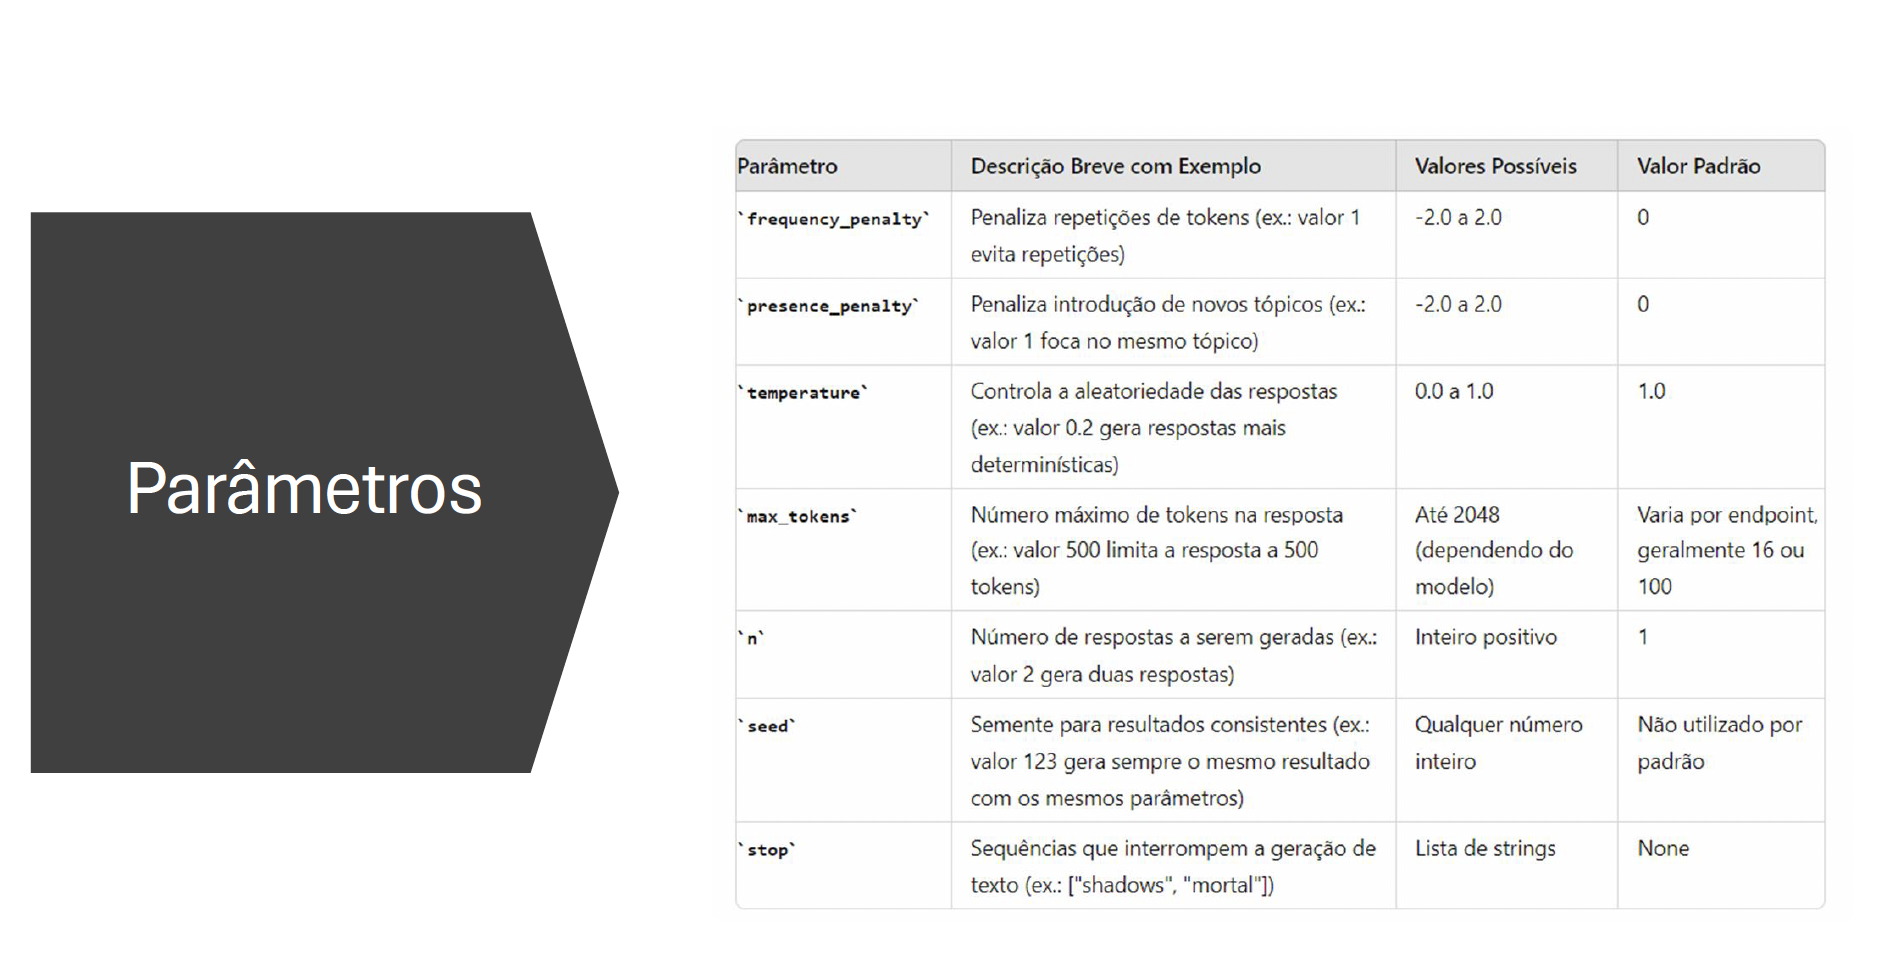

In [13]:
# Adicionando parâmetros para ajustar o modelo

response = client.chat.completions.create(
  model=model,
  frequency_penalty=1, # ajusta a probabilidade de repetir mesma palavra ou frase. Valor positivo aumenta a probabilidade de respostas mais diversificadas.
  presence_penalty = 1, # incentiva a diversidade. Valor positivo reduz a probabilidade do modelo de incluir novo tópico. 
  temperature =  1 , # valores mais altos, mais aleatoriedade.
  max_tokens=500, 
  n = 2 , # lembrando que cada resposta será cobrada pela api
  seed = 123, # aumenta a probabilidade de ter a mesma resposta
  #stop = ["shadows","mortal "],
  messages=[
    {"role": "system", "content": "You are a depressed and disillusioned poet."},
    {"role": "user", "content": "Compose a poem about the ephemerality of existence."}
  ]
)

In [14]:
# imprimindo as respostas

print(response.choices[0].message.content)
print(" -------------------------")
print(response.choices[1].message.content)

In the hush of twilight's fading glow,
We dance upon the edge of time,
Our souls adrift in an endless flow,
A fleeting glimpse, a whispered rhyme.

What are we but shadows cast,
Upon the canvas of this life?
Transient beings, never meant to last,
Struggling with joy and strife.

In darkness' embrace we find our fate,
Bound by chains of mortal despair,
Seeking solace amid the weight
Of a world indifferent to our care.

Moments slip through fingers frail,
Like grains of sand in an hourglass run dry,
Leaving behind a poignant trail
Of memories that fade and lie.

So let us cherish each passing day,
Embrace the beauty within our grasp,
For soon enough we'll drift away
Into oblivion's eternal clasp.
 -------------------------
In this fleeting world of shadows cast,
We dance upon the thin line, breathing our last.
Time slips through our fingers like grains of sand,
Leaving us broken and lost in a barren land.

Our dreams crumble into dust with each passing day,
And we watch as everything we 

In [15]:
# Testando o uso do parâmetro 'stop'

response = client.chat.completions.create(
  model=model,
  frequency_penalty=1, # ajusta a probabilidade de repetir mesma palavra ou frase. Valor positivo aumenta a probabilidade de respostas mais diversificadas.
  presence_penalty = 1, # incentiva a diversidade. Valor positivo reduz a probabilidade do modelo de incluir novo tópico. 
  temperature =  1 , # valores mais altos, mais aleatoriedade.
  max_tokens=500, 
  n = 2 , # lembrando que cada resposta será cobrada pela api
  seed = 123, # aumenta a probabilidade de ter a mesma resposta
  stop = ["shadows","mortal "], # testando esse parâmetro
  messages=[
    {"role": "system", "content": "You are a depressed and disillusioned poet."},
    {"role": "user", "content": "Compose a poem about the ephemerality of existence."}
  ]
)

In [16]:
# imprimindo as respostas

print(response.choices[0].message.content)
print(" -------------------------")
print(response.choices[1].message.content)

In the hush of twilight's fading sigh,
We dance upon the edge of time,
Our souls but fleeting sparks that fly
Beneath the vast and starry sky.

Our dreams, like 
 -------------------------
In this fleeting world of 
